<a href="https://colab.research.google.com/github/EdinK48/ITNPAI_Assignment_Edin_Kciku_3033225/blob/main/ITNPAI1_assignment_Student3033225_TaskB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import tensorflow and load data into test and training data
import tensorflow as tf 

# Build arrays and access its mathematical functions
import numpy as np

import os  # Module for path names
from keras.models import model_from_json

# Import library for picture display and adjust the size of display
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['figure.dpi']  = 100

# import library for random picture selection
import random



# Split Cifar10 images into train and test data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
# Show dimensions of X_train and y_train
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


In [ ]:
# Example output of y_train
print(y_train[0])

[6]


y_train and y_test contain the classes as numbers --> the number of entries in y_train are the number of pictures in X_train

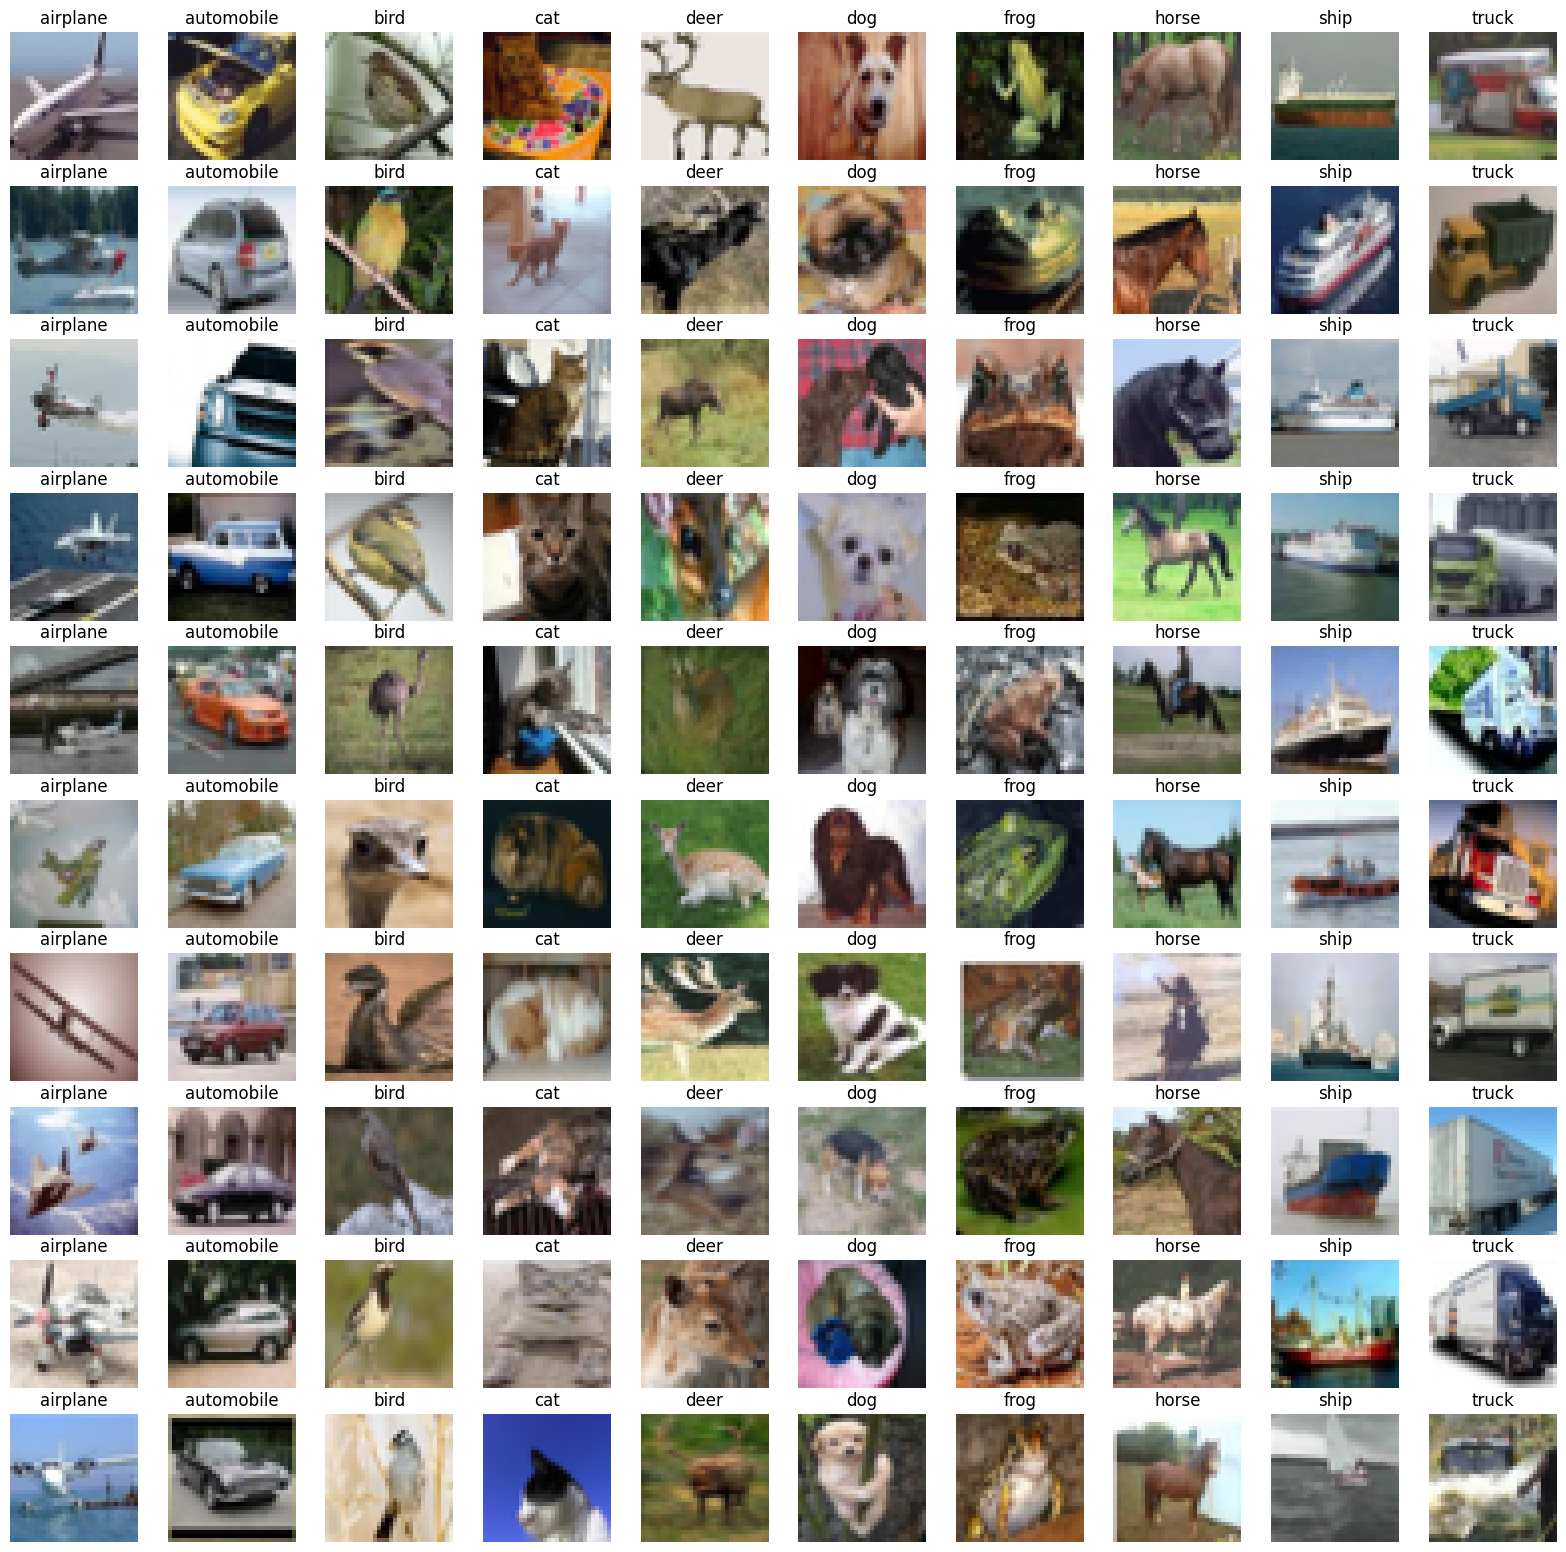

In [ ]:
# mapping of class IDs and class names
mapping_class_number = """
0	airplane
1	automobile
2	bird
3	cat
4	deer
5	dog
6	frog
7	horse
8	ship
9	truck
"""

# Dictionnary that contains the classes as keys.
# Each key contains a list of pictures belonging to the class.
pics_and_classes = {"airplane": [],
                    "automobile": [],
                    "bird": [],
                    "cat": [],
                    "deer": [],
                    "dog": [],
                    "frog": [],
                    "horse": [],
                    "ship": [],
                    "truck": []}

# Loop over range from 0 to number of entries in y_train
# Depending on the entry from y_train that is derived from index i, access 
# the corresponding key from mapping_class_number. Retrieve the picture from
# X_train depending on the index i, and allocate it to the list that belongs to
# the previously retrieved class
for i in range(0, y_train.shape[0]):  # from 0 to number of entries in y_train
  if y_train[i] == 0:  # class airplane
    pics_and_classes["airplane"].append(X_train[i])
  elif y_train[i] == 1:  # class automobile
    pics_and_classes["automobile"].append(X_train[i])
  elif y_train[i] == 2:  # class bird
    pics_and_classes["bird"].append(X_train[i])
  elif y_train[i] == 3:  # class cat
    pics_and_classes["cat"].append(X_train[i])
  elif y_train[i] == 4:  # class deer
    pics_and_classes["deer"].append(X_train[i])
  elif y_train[i] == 5:  # class dog
    pics_and_classes["dog"].append(X_train[i])
  elif y_train[i] == 6:  # class frog
    pics_and_classes["frog"].append(X_train[i])
  elif y_train[i] == 7:  # class horse
    pics_and_classes["horse"].append(X_train[i])
  elif y_train[i] == 8:  # class ship
    pics_and_classes["ship"].append(X_train[i])
  elif y_train[i] == 9:  # class truck
    pics_and_classes["truck"].append(X_train[i])


# Copy of pics_and_classes that can be manipulated freely while keeping
# the original pics_and_classes unchanged
pics_classes_copy = pics_and_classes.copy()

# Initilize the container for the display of the pictures
fig, ax = plt.subplots(10, 10)

images_selected = []
column = 0
# For each key / class inpics__classes_copy, choose randomly 10 pictures
for key in pics_classes_copy:
  for i in range(0, 10):  # 10 random pictures per key / class
    img = random.choice(pics_classes_copy[key])
    ax[i, column].imshow(img)
    ax[i, column].title.set_text(key)
    ax[i, column].axis("off")
  column += 1



# Build LeNet CNN

In [ ]:
def normalize_data(X_train, y_train, X_test, y_test):
  # Flatten pictures to 1 dimension
  X_train = np.asarray(X_train, dtype=np.float32)
  y_train = np.asarray(y_train, dtype=np.int32).flatten()
  X_test = np.asarray(X_test, dtype=np.float32)
  y_test = np.asarray(y_test, dtype=np.int32).flatten()
  # Normaliza the data: subtract the mean pixel and divide by stand. diviation
  mean_pixel = X_train.mean(axis=(0, 1, 2), keepdims=True)
  std_pixel = X_train.std(axis=(0, 1, 2), keepdims=True)
  X_train = (X_train - mean_pixel) / std_pixel
  X_test = (X_test - mean_pixel) / std_pixel
  # one-hot encoding for the labels
  # If for example class Dog: value approx. 1, the rest 0
  y_train = tf.keras.utils.to_categorical(y_train, 10)
  y_test = tf.keras.utils.to_categorical(y_test, 10)

  return X_train, y_train, X_test, y_test


X_train_norm, y_train_norm, X_test_norm, y_test_norm = normalize_data(X_train, y_train, X_test, y_test)

In [ ]:
def lenet_builder():
    # Define a tensor with shape input_shape.
    X_input = tf.keras.layers.Input((32, 32, 3))
    # Create convolutional layer
    X = tf.keras.layers.Conv2D(filters=20, kernel_size=5, padding='same',
                      activation='relu')(X_input)
    # Create a downsampled (pooled) feature map derived by
    # maximum value for patches of a feature map
    X = tf.keras.layers.MaxPool2D()(X)
    X = tf.keras.layers.Conv2D(filters=50, kernel_size=5, padding='same',
                      activation='relu')(X)
    X = tf.keras.layers.MaxPool2D()(X)
    X = tf.keras.layers.Flatten()(X)  # transform to linear output
    # Deeply connected layer
    X = tf.keras.layers.Dense(500, activation='relu')(X)
    X = tf.keras.layers.Dense(10, activation='softmax')(X)

    model = tf.keras.Model(X_input, X)
    

    return model


lenet_base = lenet_builder()
lenet_base.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9, nesterov=True),
              loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"])
history = lenet_base.fit(X_train_norm, y_train_norm, epochs=15, batch_size=64, verbose=2, validation_data=(X_test_norm, y_test_norm))

Epoch 1/15
782/782 - 4s - loss: 1.2962 - accuracy: 0.5409 - val_loss: 1.0228 - val_accuracy: 0.6435 - 4s/epoch - 5ms/step
Epoch 2/15
782/782 - 3s - loss: 0.8972 - accuracy: 0.6854 - val_loss: 0.9351 - val_accuracy: 0.6798 - 3s/epoch - 4ms/step
Epoch 3/15
782/782 - 3s - loss: 0.6999 - accuracy: 0.7549 - val_loss: 0.8638 - val_accuracy: 0.7030 - 3s/epoch - 4ms/step
Epoch 4/15
782/782 - 3s - loss: 0.5313 - accuracy: 0.8152 - val_loss: 0.8713 - val_accuracy: 0.7151 - 3s/epoch - 4ms/step
Epoch 5/15
782/782 - 3s - loss: 0.3821 - accuracy: 0.8664 - val_loss: 0.9970 - val_accuracy: 0.7087 - 3s/epoch - 4ms/step
Epoch 6/15
782/782 - 3s - loss: 0.2604 - accuracy: 0.9093 - val_loss: 1.0989 - val_accuracy: 0.7084 - 3s/epoch - 4ms/step
Epoch 7/15
782/782 - 3s - loss: 0.1734 - accuracy: 0.9412 - val_loss: 1.2009 - val_accuracy: 0.7147 - 3s/epoch - 4ms/step
Epoch 8/15
782/782 - 3s - loss: 0.1331 - accuracy: 0.9540 - val_loss: 1.3490 - val_accuracy: 0.7227 - 3s/epoch - 4ms/step
Epoch 9/15
782/782 - 3s 

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


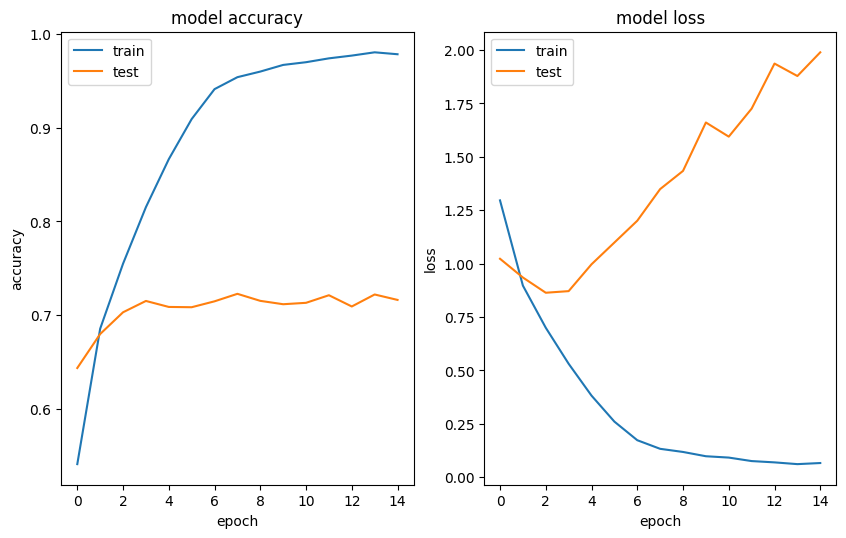

In [ ]:
# Display the accuracy and loss for each epoch
plt.rcParams['figure.figsize'] = (10, 6)
fig, ax = plt.subplots(1,2)
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].title.set_text('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', "test"], loc='upper left')


ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].title.set_text('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', "test"], loc='upper left')

In [ ]:
# Convert model to JSON
model_json = lenet_base.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# Convert weights to HDF5
lenet_base.save_weights("model.h5")
print("Saved model to disk")

 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_lenet_base = model_from_json(loaded_model_json)
# load weights into new model
loaded_lenet_base.load_weights("model.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


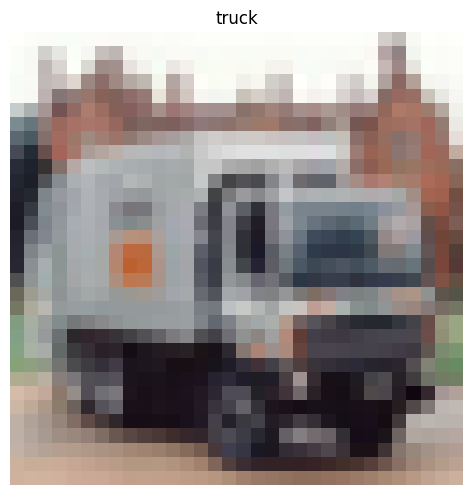

In [114]:
def predict(model, X_test, X_train_test, img_nr):
  if img_nr >= 10000:
    print("Only 10000 test data available")
    return
  # predict from test data
  y_pred = model.predict(X_test_norm)
  # get the values for y_pred as a list
  # the index of the value approx. 1 is the
  # number of the classification
  y_pred_list = list(y_pred[img_nr])
  class_nr = 0
  # get class number
  for i in y_pred_list:
    if class_nr < i:
      class_nr = i
  class_pos = y_pred_list.index(class_nr)
  class_name = None

  # get class name
  if class_pos == 0:
    class_name = "airplane"
  elif class_pos == 1:
    class_name = "automobile"
  elif class_pos == 2:
    class_name = "bird"
  elif class_pos == 3:
    class_name = "cat"
  elif class_pos == 4:
    class_name = "deer"
  elif class_pos == 5:
    class_name = "dog"
  elif class_pos == 6:
    class_name = "frog"
  elif class_pos == 7:
    class_name = "horse"
  elif class_pos == 8:
    class_name = "ship"
  elif class_pos == 9:
    class_name = "truck"

  #display result
  plt.title(class_name)
  plt.imshow(X_test[img_nr])
  plt.axis("off")


predict(loaded_lenet_base, X_test, X_test_norm, 11)


In [ ]:
from keras.regularizers import l2

def lenet_builder_adj_1():
    # Define a tensor with shape input_shape.
    X_input = tf.keras.layers.Input((32, 32, 3))
    # Create convolutional layer
    X = tf.keras.layers.Conv2D(filters=20, kernel_size=3, padding='same',
                      activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(X_input)
    # Create a downsampled (pooled) feature map derived by
    # maximum value for patches of a feature map
    X = tf.keras.layers.MaxPool2D()(X)
    # Randomly selected neurons are ignored during training
    X = tf.keras.layers.Dropout(0.3)(X) 
    X = tf.keras.layers.Conv2D(filters=50, kernel_size=5, padding='same',
                      activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(X)
    X = tf.keras.layers.MaxPool2D()(X)
    X = tf.keras.layers.Dropout(0.3)(X)
    X = tf.keras.layers.Flatten()(X)  # transform to linear output
    # Deeply connected layer
    X = tf.keras.layers.Dense(500, activation='relu')(X)
    X = tf.keras.layers.Dropout(0.3)(X)
    X = tf.keras.layers.Dense(10, activation='softmax')(X)

    model = tf.keras.Model(X_input, X)

    return model


lenet_adj = lenet_builder_adj_1()
lenet_adj.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=2e-2, momentum=0.9, nesterov=True),
              loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"])

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

# train_tf    test_tf   validation_tf
history = lenet_adj.fit(X_train_norm, y_train_norm, epochs=200, batch_size=2048, verbose=2, validation_data=(X_test_norm, y_test_norm), callbacks=es_callback)
#history = lenet_adj.fit(X_train_norm, y_train_norm, epochs=200, batch_size=2048, verbose=2, validation_data=(X_test_norm, y_test_norm, callbacks=es_callback))

Epoch 1/200
25/25 - 2s - loss: 2.4569 - accuracy: 0.2211 - val_loss: 2.1740 - val_accuracy: 0.3462 - 2s/epoch - 76ms/step
Epoch 2/200
25/25 - 1s - loss: 2.0811 - accuracy: 0.3532 - val_loss: 1.8691 - val_accuracy: 0.4287 - 1s/epoch - 44ms/step
Epoch 3/200
25/25 - 1s - loss: 1.8626 - accuracy: 0.4107 - val_loss: 1.7001 - val_accuracy: 0.4722 - 1s/epoch - 44ms/step
Epoch 4/200
25/25 - 1s - loss: 1.7327 - accuracy: 0.4502 - val_loss: 1.6196 - val_accuracy: 0.4946 - 1s/epoch - 44ms/step
Epoch 5/200
25/25 - 1s - loss: 1.6375 - accuracy: 0.4767 - val_loss: 1.5191 - val_accuracy: 0.5202 - 1s/epoch - 44ms/step
Epoch 6/200
25/25 - 1s - loss: 1.5620 - accuracy: 0.4971 - val_loss: 1.4527 - val_accuracy: 0.5424 - 1s/epoch - 46ms/step
Epoch 7/200
25/25 - 1s - loss: 1.5090 - accuracy: 0.5105 - val_loss: 1.3945 - val_accuracy: 0.5574 - 1s/epoch - 45ms/step
Epoch 8/200
25/25 - 1s - loss: 1.4529 - accuracy: 0.5276 - val_loss: 1.3448 - val_accuracy: 0.5678 - 1s/epoch - 45ms/step
Epoch 9/200
25/25 - 1s -

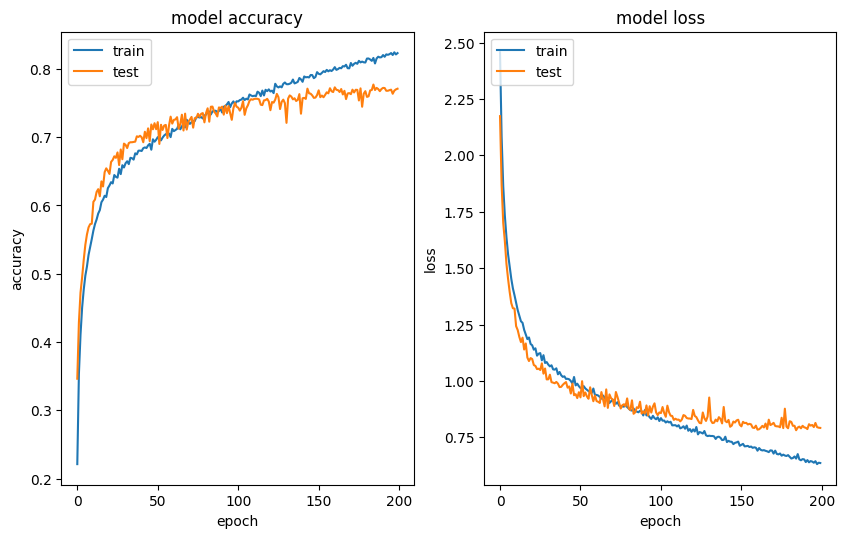

In [ ]:
# Display the accuracy and loss for each epoch
fig, ax = plt.subplots(1,2)
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].title.set_text('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', "test"], loc='upper left')


ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].title.set_text('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', "test"], loc='upper left')

In [ ]:
# Convert model to JSON
model_json = lenet_adj.to_json()
with open("model_2.json", "w") as json_file:
    json_file.write(model_json)
# Convert weights to HDF5
lenet_adj.save_weights("model.h5")
print("Saved model to disk")

 
# load json and create model
json_file = open('model_2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_lenet_adj = model_from_json(loaded_model_json)
# load weights into new model
loaded_lenet_adj.load_weights("model.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


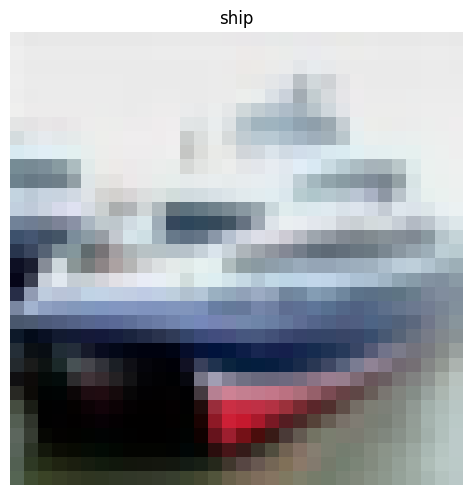

In [118]:
predict(loaded_lenet_adj, X_test, X_test_norm, 1)